# Python Data Analysis Report

## Prevalence and Factors Associated with Hypertension among People Living with HIV (PLWHIV) 

<!-- ### Data Analysis Plan:
1. Introduction
2. Exploratory data analysis
3. Prevalence of hypertension in PLWHIV on ART or not
4. Factors associated with hypertension in PLWHIV on ART or not
5. Conclusion 
6. Recommendations -->

*Boni Maxime Ale*

*NYC Data Science Academy*

*21 February 2022*

### Introduction
Hypertension is a major modifiable risk factor for cardiovascular diseases (CVD) globally. In low- and middle-income settings, including sub-Saharan Africa (SSA), hypertension prevalence has been increasing rapidly over the past several decades. The World Health Organization (WHO) estimates that 46% of individuals >25 years in SSA have hypertension, with rising rates due to demographic transitions that have led to sedentary lifestyles, smoking, harmful alcohol use and consumption of processed foods [1–3]. Estimates of hypertension prevalence in Kenya are high (ranging from 12.6–36.9%) with higher rates in urban areas [1, 4, 5]. Older age, higher body mass index (BMI), alcohol consumption, cigarette smoking, and higher socioeconomic status have been associated with hypertension in previous studies in Kenya [5–7].

However, hypertension diagnosis and treatment are often delayed due to its asymptomatic nature, leading to increased risk of complications and mortality [8]. In SSA, screening, diagnosis, and treatment remain inadequate [9] and a recent study found that 40% of individuals with hypertension in East and West Africa were unaware of their status. The WHO 2017 report on non-communicable diseases (NCD) risk factors identified hypertension as the leading cause of death across income levels [10]. In 2015, hypertension caused an estimated 7.5 million deaths, accounting for 12.8% of all deaths globally [11]. In particular, sub-Saharan Africa (SSA) is facing a dual burden of communicable and non-communicable diseases, including CVD and cancers, with fewer resources for managing NCD [1, 12, 13].

The widespread use of antiretroviral therapy (ART) in SSA has resulted in a near normal life expectancy among persons with HIV (PWH); overall approximately 76% of PWH in SSA are virally suppressed [14]. This increased lifespan, however, may lead to an increased risk of NCD, including hypertension, due to the HIV virus and ART toxicity [14–17]. Studies on hypertension in PWH have shown varied results, some showing higher prevalence of hypertension while others showing no differences or lower prevalence of hypertension among PWH [18, 19]. The majority of studies have included PWH who are ART naïve or on ART but with poorly controlled viral loads compared to HIV-negative individuals in SSA [15, 18, 20, 21]. Data are lacking among PWH who are virally suppressed on ART. We sought to estimate the prevalence of hypertension among virally suppressed PWH on long-term ART compared to HIV-negative adults in western Kenya and identify factors associated with hypertension. These data can help guide prevention strategies and inform allocation of resources for integrated hypertension and HIV management.

### Materials and Methods

* Study design and Setting 


* Definition of variables



* Statistical Analysis

### Data Analysis and Results

* Exploratory Data Analysis

In [2]:
## Import library 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# pip install seaborn
import seaborn as sns

In [18]:
## Loading data
hiv = pd.read_csv("dataset_plos.csv", index_col = "year", parse_dates = True)

## check the first 5 observations of the data set
hiv.head(5)
#print(hiv.info())

,sex,age,priorhivtest,treatment,hivresult,hivnew,cd4_cat,bp_cat,bmi_cat,stisymptoms,tbsymptoms,diabsymptoms
year,,,,,,,,,,,,
2008-01-01,1.0,49.0,0.0,NaN,0.0,0.0,NaN,5.0,3.0,0,0,0
2008-01-01,1.0,20.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,0,0,0
2008-01-01,2.0,29.0,0.0,NaN,0.0,0.0,NaN,2.0,4.0,0,0,0
2008-01-01,2.0,38.0,1.0,NaN,0.0,0.0,NaN,1.0,4.0,0,0,0
2008-01-01,1.0,32.0,0.0,NaN,0.0,0.0,NaN,5.0,2.0,0,0,0


In [4]:
## let's create a copy of hiv dataset for data wrangling
hiv2 = hiv.copy()

In [5]:
## Treament group ART and non ART
## let's convert the 7 modalities of bp_cat into two (normal and high)
conversion_dictionary_trt = {1 : "On ART",
                             2 : "Not on ART",
                             3 :  "Not on ART",
                             4 : "Not on ART"}

hiv2['trt'] = hiv2['treatment'].replace(conversion_dictionary_trt)

## let's see the frequency in each group
print(hiv2['trt'].value_counts())

print(hiv2['trt'].value_counts(normalize = True))

Not on ART    1362
On ART        1100
Name: trt, dtype: int64
Not on ART    0.553209
On ART        0.446791
Name: trt, dtype: float64


In [6]:
## Gender
## change sex data type 
hiv2['sex'] = hiv2['sex'].astype('category')
## rename gender category
hiv2['sex'] = hiv2['sex'].cat.rename_categories({2:"female",1: "male"})

## let's decribe the number of male and female 
print(hiv2["sex"].value_counts())

## and get there percentage
print(hiv2["sex"].value_counts(normalize = True))

female    22178
male      21757
Name: sex, dtype: int64
female    0.504791
male      0.495209
Name: sex, dtype: float64


In [32]:
## Age groups
print(hiv2["age"].value_counts())
bins = [12, 20, 30, 40, 50, 60, 70]
labels = ["12-20", "20-30", "30-40", "40-50", "50-60", "60+"]
hiv2["age_group"] = pd.cut(hiv2["age"], bins = bins, labels = labels, right = False)

25.0    1563
23.0    1537
24.0    1485
26.0    1456
20.0    1450
        ... 
87.0       5
84.0       4
86.0       4
88.0       2
93.0       1
Name: age, Length: 77, dtype: int64


In [41]:
## change bmi_cat data type 
hiv2['bmi_cat2'] = hiv2['bmi_cat'].astype('category')
## rename bmi category
hiv2['bmi_cat2'] = hiv2['bmi_cat2'].cat.rename_categories({1: "Underweight",
                                                          2:"Normal weight",
                                                          3:"Overweight",
                                                          4:"Obese"})

### Prevalence of Hypertension in general and in subgroups

In [7]:
## Blood Pressure 
## let's convert the 7 modalities of bp_cat into two (normal and high)
conversion_dictionary = {1 : "Normal",
                        2: "Normal",
                        3: "Normal",
                        4 : "High",
                        5 : "High",
                        6 : "High",
                        7 : "Normal"
                        }

hiv2['bp_cat2'] = hiv2['bp_cat'].replace(conversion_dictionary)

## let's see the frequency in each group
print(hiv2["bp_cat2"].value_counts())

print(hiv2["bp_cat2"].value_counts(normalize = True))

Normal    34588
High       8948
Name: bp_cat2, dtype: int64
Normal    0.794469
High      0.205531
Name: bp_cat2, dtype: float64


There are 20.55 % of PLWHIV who has hypertension. This is considerable and not very different to the general population in Cape Town in SA

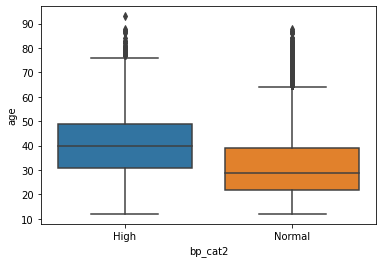

In [8]:
## let's see the distribution of hypertension by age
bp_age = sns.boxplot(x = "bp_cat2", y = "age", data = hiv2)

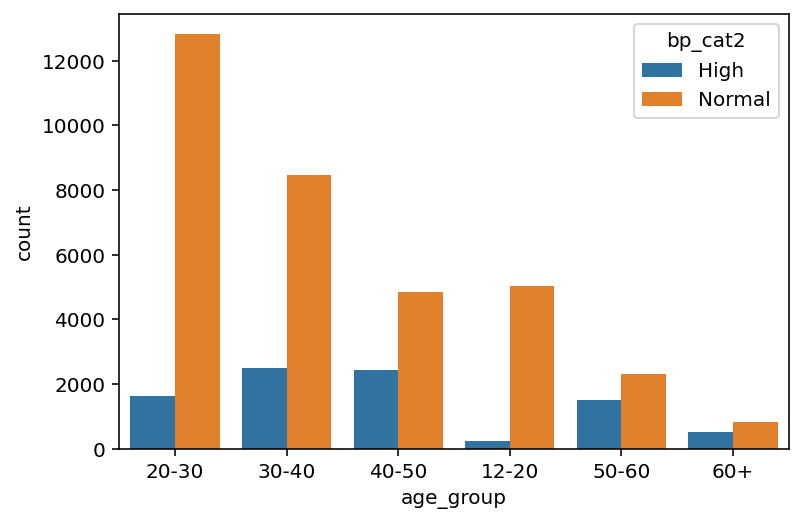

In [49]:
bp_age_group = sns.countplot(x = "age_group",
              order = hiv2["age_group"].value_counts(ascending= False).index,
              hue = "bp_cat2", 
              data = hiv2);

In [9]:
## let's see the proportion of hypertension by gender
pd.crosstab(hiv2["sex"], hiv2["bp_cat2"], margins = True)

bp_cat2,High,Normal,All
sex,,,
male,4586,17000,21586
female,4362,17585,21947
All,8948,34585,43533


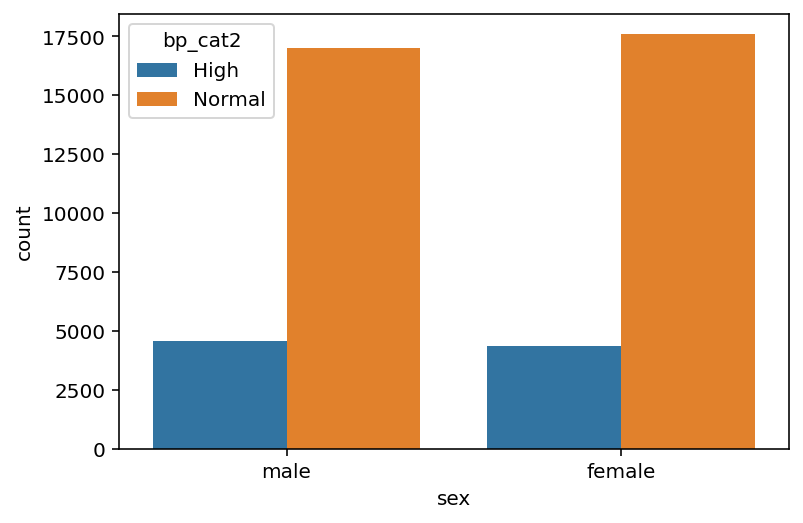

In [47]:
# Graphics in retina format are more sharp and legible
bp_sex = sns.countplot(x = "sex",
              order = hiv2['sex'].value_counts(ascending = True).index,
              hue = "bp_cat2", 
              data = hiv2);
# abs_values = hiv2['bp_cat2'].value_counts(ascending = False)
# rel_values = hiv2['bp_cat2'].value_counts(ascending = False, normalize = True).values * 100
# lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
# bp_sex.bar_label(container= bp_sex.containers[0], labels = lbls)

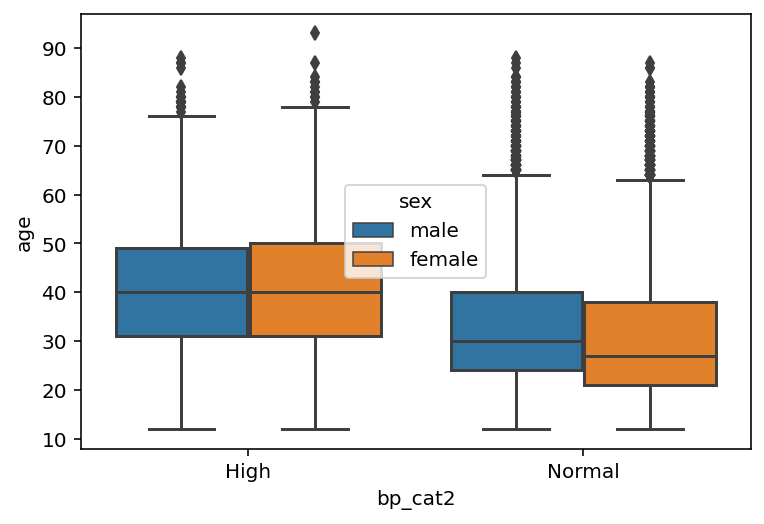

In [11]:
## let's see the proportion of hypertension by age and gender
bp_age_sex = sns.boxplot(x = "bp_cat2", y = "age", hue = "sex", data = hiv2)

In [39]:
## let's see the proportion of hypertension by CD4 count category
pd.crosstab(hiv2["cd4_cat"], hiv2["bp_cat2"], margins = True)

bp_cat2,High,Normal,All
cd4_cat,,,
1.0,7,26,33
2.0,157,485,642
3.0,138,436,574
4.0,158,514,672
5.0,275,848,1123
All,735,2309,3044


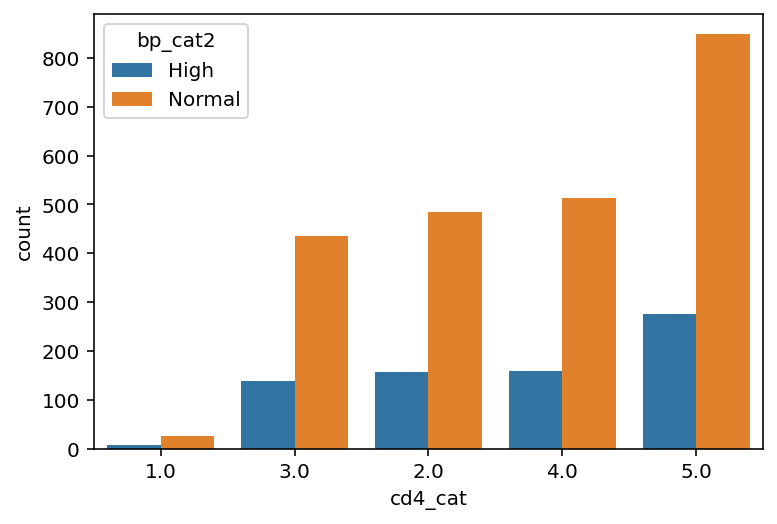

In [46]:
bp_cd4 = sns.countplot(x = "cd4_cat",
              order = hiv2["cd4_cat"].value_counts(ascending = True).index,
              hue = "bp_cat2", 
              data = hiv2);

In [42]:
## let's see the proportion of hypertension by Body mass index category
pd.crosstab(hiv2["bmi_cat2"], hiv2["bp_cat2"], margins = True)

bp_cat2,High,Normal,All
bmi_cat2,,,
Underweight,153,1446,1599
Normal weight,3050,17495,20545
Overweight,2291,7518,9809
Obese,3383,7805,11188
All,8877,34264,43141


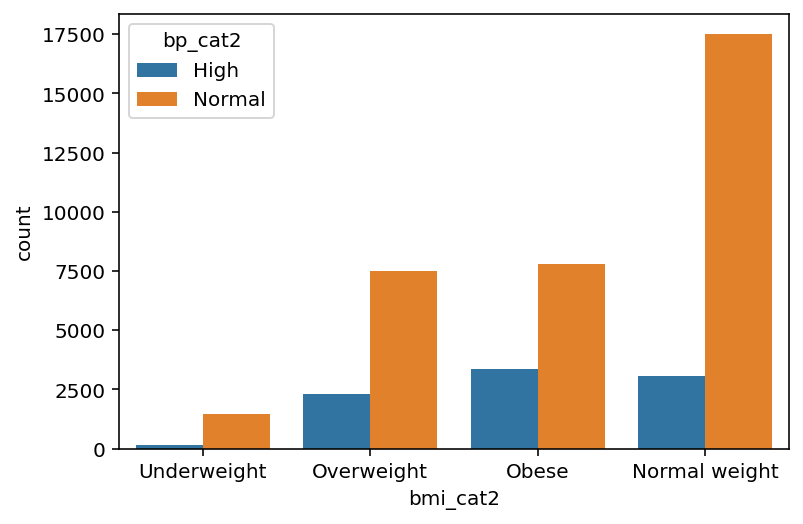

In [44]:
%config InlineBackend.figure_format = 'retina'
bp_bmi = sns.countplot(x = "bmi_cat2",
              order = hiv2['bmi_cat2'].value_counts(ascending = True).index,
              hue = "bp_cat2", 
              data = hiv2);

In [52]:
## let's see the proportion of hypertension among PLWHIV on ART and those not on ART
pd.crosstab(hiv2["trt"], hiv2["bp_cat2"], margins = True)

bp_cat2,High,Normal,All
trt,,,
Not on ART,285,1070,1355
On ART,215,871,1086
All,500,1941,2441


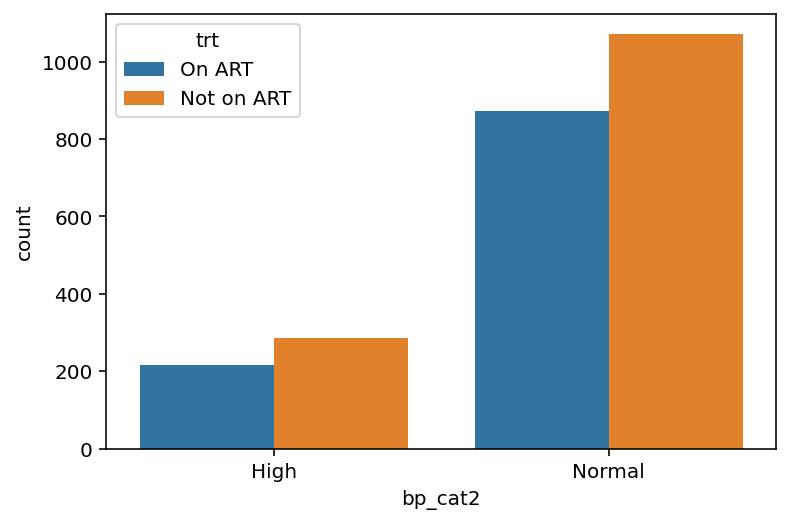

In [45]:
%config InlineBackend.figure_format = 'retina'
bp_bmi = sns.countplot(x = "bp_cat2",
              order = hiv2['bp_cat2'].value_counts(ascending= True).index,
              hue = "trt", 
              data = hiv2);

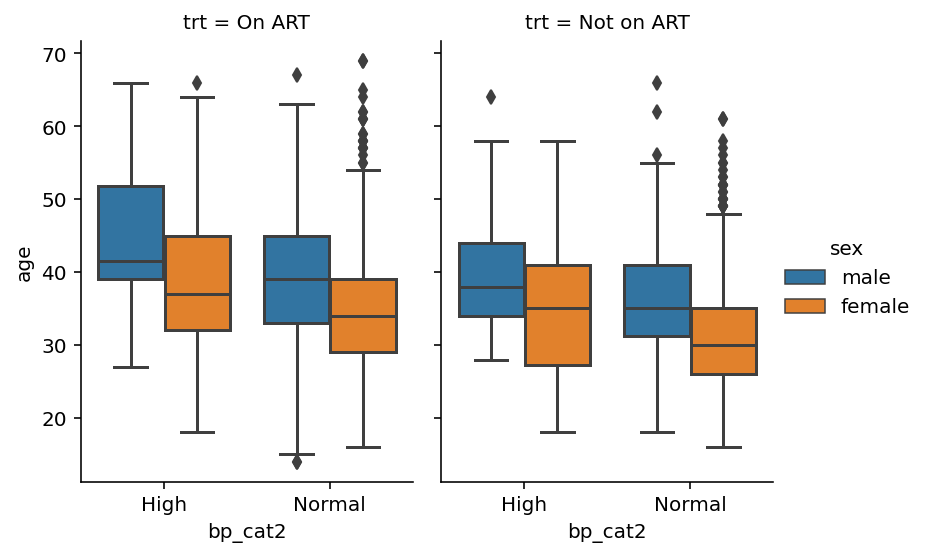

In [20]:
bp_bmi_sex = sns.catplot(x = "bp_cat2", y = "age",hue = "sex", data = hiv2, col = "trt",
...                 kind="box",
...                 height=4, aspect=.7);